Sammy Pardes<br>
IST 718<br>
Lab 9<br>
9/5/2021

### Helpful Resources

https://stackoverflow.com/questions/41415629/importerror-no-module-named-tensorflow-python
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
https://colab.research.google.com/github/liady/ssp19ai/blob/master/Excercise_3_Fashion_MNIST_Classifier.ipynb#scrollTo=IjnLH5S2CaWx
https://medium.com/geekculture/the-story-behind-random-seed-42-in-machine-learning-b838c4ac290a
https://www.datasciencecentral.com/profiles/blogs/decision-tree-vs-random-forest-vs-boosted-trees-explained
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
https://stackoverflow.com/questions/5316206/converting-dot-to-png-in-python
https://stackoverflow.com/questions/38272071/attribute-error-using-pydot-to-create-a-graph
https://towardsdatascience.com/4-ways-to-visualize-individual-decision-trees-in-a-random-forest-7a9beda1d1b7
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://numpy.org/doc/stable/reference/generated/numpy.unique.html
http://athena.ecs.csus.edu/~hoangkh/Image%20Classification%20with%20Fashion-MNIST%20and%20CIFAR-10.html
https://stackoverflow.com/questions/61742556/valueerror-shapes-none-1-and-none-2-are-incompatible
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename_axis.html
https://stackoverflow.com/questions/26336251/pandas-rename-single-dataframe-column-without-knowing-column-name

In [1]:
# Install Statements

#!pip install keras
#!pip install --upgrade pip
#!pip uninstall tensorflow
#!pip install tensorflow
#!pip install pydotplus


In [165]:
# Import Statements

import pandas as pd
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import tensorflow as tf
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


### Obtain

In [3]:
# Load the fashion data set

from keras.datasets import fashion_mnist

fashion_mnist

<module 'keras.datasets.fashion_mnist' from 'C:\\Users\\slpar\\anaconda3\\lib\\site-packages\\keras\\datasets\\fashion_mnist.py'>

In [4]:
# Extract training and testing data sets from fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#x_train[0][0]
#y_train[0]

#x_test[0][0]
#y_test[0]

### Scrub and Explore

In [5]:
# Randomize the indicies of the training data

n = len(x_train)

shuffle = np.random.permutation(n)

x_train, y_train = x_train[shuffle], y_train[shuffle]


[]

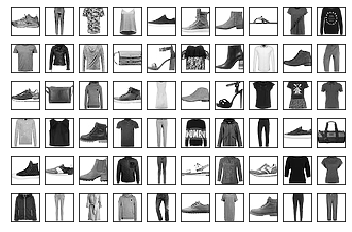

In [6]:
# Generate plot of randomized images 

fig, ax = plt.subplots(nrows = 6, ncols = 10, sharex = True, sharey = True)

ax = ax.flatten()

for i in range(60):
    img = x_train[i].reshape(28, 28)
    ax[i].imshow(img, cmap = 'Greys', interpolation = 'nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])


In [7]:
# Flatten the 28 x 28 pixel image matrices to become arrays of 784 pixels

n_pixels = x_train.shape[1] * x_train.shape[2]
n_pixels

x_train = x_train.reshape(x_train.shape[0], n_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], n_pixels).astype('float')

In [8]:
# Normalize colors by dividing by the number of possible colors (0-255)

#(x_train/255)[0]

x_train = x_train/255
x_test = x_test/255

#x_train[0]
#x_train[0].shape

In [9]:
# Display number of rows in the test and traning sets 

print('# of training rows: %d, # of training columns: %d' % (x_train.shape[0], x_train.shape[1]))
print('# of test rows: %d, # of test columns: %d' % (x_test.shape[0], x_test.shape[1]))


# of training rows: 60000, # of training columns: 784
# of test rows: 10000, # of test columns: 784


### Model

#### MLP 1

In [11]:
# MLP1 - create the model with adam solver

my_mlp = MLPClassifier(hidden_layer_sizes = 150, max_iter = 1000, alpha = 0.0001, solver = "adam",
                       verbose = 10, tol = .0001, random_state = 1, learning_rate_init = .01)


In [12]:
# MLP1 - Fit the model

start = time.time()

print(my_mlp.fit(x_train, y_train))

end = time.time()
final_time = end - start
print("Computation Time:", final_time/60)

mlp_time = final_time

Iteration 1, loss = 0.52438435
Iteration 2, loss = 0.38951915
Iteration 3, loss = 0.35898408
Iteration 4, loss = 0.33356150
Iteration 5, loss = 0.31870949
Iteration 6, loss = 0.31189933
Iteration 7, loss = 0.31142289
Iteration 8, loss = 0.29195306
Iteration 9, loss = 0.28726481
Iteration 10, loss = 0.28100171
Iteration 11, loss = 0.28781145
Iteration 12, loss = 0.27640742
Iteration 13, loss = 0.27790537
Iteration 14, loss = 0.27145807
Iteration 15, loss = 0.26689808
Iteration 16, loss = 0.26434432
Iteration 17, loss = 0.26157558
Iteration 18, loss = 0.26165136
Iteration 19, loss = 0.25528308
Iteration 20, loss = 0.25317329
Iteration 21, loss = 0.24535944
Iteration 22, loss = 0.24931189
Iteration 23, loss = 0.23864868
Iteration 24, loss = 0.24290546
Iteration 25, loss = 0.24058232
Iteration 26, loss = 0.24286029
Iteration 27, loss = 0.24125197
Iteration 28, loss = 0.23461776
Iteration 29, loss = 0.23300671
Iteration 30, loss = 0.23421653
Iteration 31, loss = 0.23611751
Iteration 32, los

In [15]:
# MLP1 - check model performance with training data

print("MLP Classifier Training Performance:", my_mlp.score(x_train, y_train))

MLP Classifier Training Performance: 0.9491


In [16]:
# MLP1 - check model performance with test data

mlp_acc = my_mlp.score(x_test, y_test)

print("MLP Classifier Testing Performance:", mlp_acc)

MLP Classifier Testing Performance: 0.868


#### MLP 2

In [17]:
# MLP2 - change solver to SGD

my_mlp_sgd = MLPClassifier(hidden_layer_sizes = 150, max_iter = 1000, alpha = 0.0001
                           , solver = "sgd", verbose = 10, tol = .0001, random_state = 1
                           , learning_rate_init = .01)

In [18]:
# MLP2 - fit the model

start = time.time()

print(my_mlp_sgd.fit(x_train, y_train))

end = time.time()
final_time = end - start
print("Computation Time:", final_time/60)

mlp_sgd_time = final_time

Iteration 1, loss = 0.70973945
Iteration 2, loss = 0.47636407
Iteration 3, loss = 0.43454441
Iteration 4, loss = 0.41016822
Iteration 5, loss = 0.39333502
Iteration 6, loss = 0.37852097
Iteration 7, loss = 0.36660782
Iteration 8, loss = 0.35602087
Iteration 9, loss = 0.34682101
Iteration 10, loss = 0.33930091
Iteration 11, loss = 0.33153677
Iteration 12, loss = 0.32426167
Iteration 13, loss = 0.31783552
Iteration 14, loss = 0.31202792
Iteration 15, loss = 0.30625689
Iteration 16, loss = 0.30050930
Iteration 17, loss = 0.29566338
Iteration 18, loss = 0.28993584
Iteration 19, loss = 0.28598259
Iteration 20, loss = 0.28263261
Iteration 21, loss = 0.27805694
Iteration 22, loss = 0.27466246
Iteration 23, loss = 0.26929866
Iteration 24, loss = 0.26622507
Iteration 25, loss = 0.26266071
Iteration 26, loss = 0.25991701
Iteration 27, loss = 0.25632697
Iteration 28, loss = 0.25293361
Iteration 29, loss = 0.24978906
Iteration 30, loss = 0.24673618
Iteration 31, loss = 0.24326677
Iteration 32, los

Iteration 253, loss = 0.02666842
Iteration 254, loss = 0.02541704
Iteration 255, loss = 0.02503312
Iteration 256, loss = 0.02508085
Iteration 257, loss = 0.02494525
Iteration 258, loss = 0.02438840
Iteration 259, loss = 0.02491395
Iteration 260, loss = 0.02385657
Iteration 261, loss = 0.02346721
Iteration 262, loss = 0.02387239
Iteration 263, loss = 0.02334942
Iteration 264, loss = 0.02318550
Iteration 265, loss = 0.02280570
Iteration 266, loss = 0.02221391
Iteration 267, loss = 0.02162476
Iteration 268, loss = 0.02300880
Iteration 269, loss = 0.02186544
Iteration 270, loss = 0.02084061
Iteration 271, loss = 0.02148770
Iteration 272, loss = 0.02090573
Iteration 273, loss = 0.02165337
Iteration 274, loss = 0.02064265
Iteration 275, loss = 0.02047815
Iteration 276, loss = 0.01963740
Iteration 277, loss = 0.02064693
Iteration 278, loss = 0.01952841
Iteration 279, loss = 0.01920226
Iteration 280, loss = 0.01928508
Iteration 281, loss = 0.01846338
Iteration 282, loss = 0.01800216
Iteration 

In [20]:
# MLP2 - check performance against training data

print("MLP Classifier Training Performance (SGD):", my_mlp_sgd.score(x_train, y_train))


MLP Classifier Training Performance (SGD): 0.99975


In [21]:
# MLP2 - check performance against testing data 

mlp_sgd_acc = my_mlp_sgd.score(x_test, y_test)

print("MLP Classifier Testing Performance (SGD):", mlp_sgd_acc)

MLP Classifier Testing Performance (SGD): 0.8869


#### Random Forest

In [182]:
# RF - create a random forest model

forest = RandomForestClassifier(n_estimators = 80, random_state = 42)


In [183]:
# RF - fit the model

start = time.time()

print(forest.fit(x_train, y_train))

end = time.time()
final_time = end - start
print("Computation Time:", final_time/60)

rf_time = final_time

RandomForestClassifier(n_estimators=80, random_state=42)
Computation Time: 0.9999596397082011


In [184]:
# RF - check performance of training data 

print("Random Forest Classifier Training Performance:", forest.score(x_train, y_train))


Random Forest Classifier Training Performance: 0.9999833333333333


In [185]:
# RF - check performance of testing data

rf_acc = forest.score(x_test, y_test)

print("Random Forest Classifier Testing Performance:", rf_acc)


Random Forest Classifier Testing Performance: 0.8781


[Text(318.1607395576264, 537.6913043478261, 'X[176] <= 0.022\ngini = 0.9\nsamples = 37975\nvalue = [6043, 5868, 5905, 6043, 6011, 6064, 5945, 6063, 5942\n6116]'),
 Text(127.08675679666659, 525.8739130434783, 'X[39] <= 0.029\ngini = 0.823\nsamples = 18046\nvalue = [194, 4108, 50, 2785, 82, 6054, 97, 6061, 2983, 6100]'),
 Text(74.21113002844102, 514.0565217391304, 'X[400] <= 0.025\ngini = 0.742\nsamples = 13351\nvalue = [55, 42, 6, 418, 22, 6010, 33, 6061, 2462, 6000]'),
 Text(22.483905826886623, 502.2391304347826, 'X[379] <= 0.175\ngini = 0.592\nsamples = 6281\nvalue = [16, 30, 3, 336, 1, 3029, 3, 919, 122, 5515]'),
 Text(10.012258294897844, 490.4217391304348, 'X[770] <= 0.312\ngini = 0.19\nsamples = 1375\nvalue = [1, 1, 0, 16, 0, 1965, 2, 61, 93, 48]'),
 Text(5.986161091420678, 478.60434782608695, 'X[635] <= 0.037\ngini = 0.13\nsamples = 1318\nvalue = [0, 1, 0, 6, 0, 1946, 2, 61, 24, 48]'),
 Text(2.2498124626829883, 466.78695652173917, 'X[380] <= 0.069\ngini = 0.064\nsamples = 1115\nva

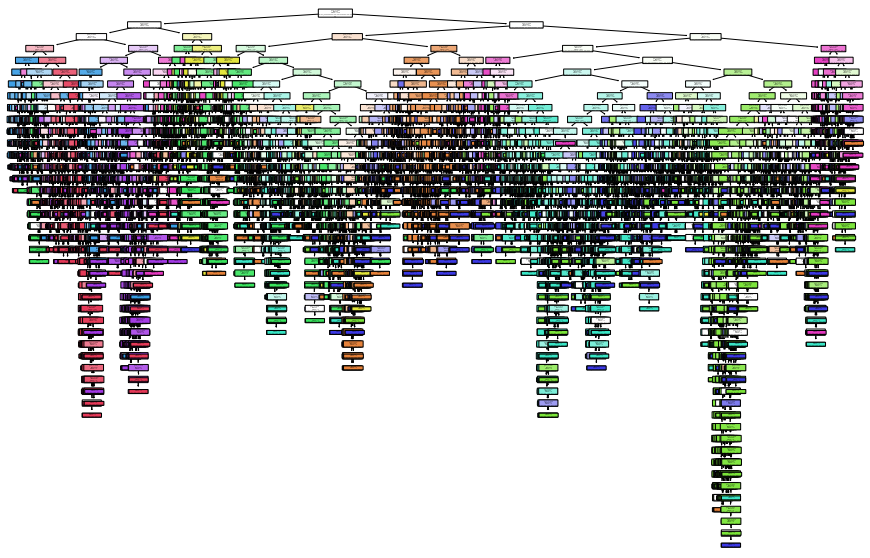

In [28]:
# RF - plot one of the trees

fig = plt.figure(figsize=(15, 10))
plot_tree(forest.estimators_[0], filled = True, impurity = True, rounded = True)


#### PCA - SVM

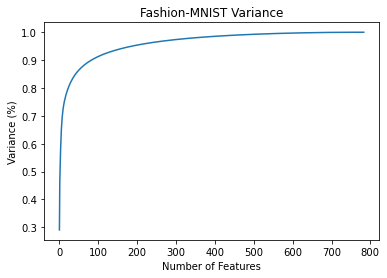

In [34]:
# PCA!

# fit the PCA with the training data
pca = PCA().fit(x_train)

# Plot the cumulative sum of eigenvalues
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Percent Variance')
plt.title('Fashion MNIST Variance by Number of Features')
plt.show()

In [37]:
# Use number of components determined from the plot above

pca = PCA(n_components = 400)

pca.fit(x_train)

PCA(n_components=400)

In [38]:
# transform the data with pca

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
                           
x_train_pca.shape


(60000, 400)

In [189]:
# SVM - model the data 

start = time.time()

svm = svm.SVC()
svm.fit(x_train_pca, y_train)

# Check performance of model
y_pred_svm_pca = svm.predict(x_test_pca)

svm_pca_accuracy = metrics.accuracy_score(y_test, y_pred_svm_pca)

print("SVM accuracy score: ", svm_pca_accuracy)
print(metrics.classification_report(y_test, y_pred_svm_pca))

end = time.time()
final_time = end - start

print("Computation Time:", final_time/60)

svm_time = final_time

SVM accuracy score:  0.8873
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.82      0.81      1000
           3       0.88      0.90      0.89      1000
           4       0.81      0.82      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.72      0.67      0.69      1000
           7       0.93      0.96      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Computation Time: 7.353681822617848


#### PCA - KNN

In [190]:
# KNN - create the model 

start = time.time()

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)

print("KNN accuracy score: ", knn_accuracy)
print(metrics.classification_report(y_test, y_pred_knn))

end = time.time()
final_time = end - start

print("Computation Time:", final_time/60)

knn_time = final_time

KNN accuracy score:  0.8554
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000

Computation Time: 13.210131839911144


#### Keras

In [67]:
# Keras - create model function

def keras_model():
    model = Sequential()
    model.add(Dense(n_pixels, input_dim = n_pixels
                    , kernel_initializer = "normal", activation = "relu"))
    model.add(Dropout(0.15))
    model.add(Dense(n_classes, kernel_initializer = "normal", activation = "softmax"))
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd"
                  , metrics = ["accuracy"])
    
    return model


# define pixel and class variables 
n_pixels = 28*28
n_classes = y_test.shape[0]


In [68]:
# Keras - fit the model 

start = time.time() 

keras_model = keras_model()

keras_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100
          , batch_size = 500, verbose = 2)

# determine model accuracy 

keras_acc = keras_model.evaluate(x_test, y_test, verbose = 0)

print("Keras accuracy score: ", keras_acc)

end = time.time()
final_time = end-start
print(final_time/60) 

keras_time = final_time

Epoch 1/100
120/120 - 16s - loss: 2.9354 - accuracy: 0.5051 - val_loss: 1.2025 - val_accuracy: 0.6861
Epoch 2/100
120/120 - 19s - loss: 1.0840 - accuracy: 0.6844 - val_loss: 0.9092 - val_accuracy: 0.7278
Epoch 3/100
120/120 - 24s - loss: 0.8938 - accuracy: 0.7218 - val_loss: 0.7956 - val_accuracy: 0.7577
Epoch 4/100
120/120 - 27s - loss: 0.8026 - accuracy: 0.7460 - val_loss: 0.7365 - val_accuracy: 0.7623
Epoch 5/100
120/120 - 26s - loss: 0.7457 - accuracy: 0.7617 - val_loss: 0.6874 - val_accuracy: 0.7817
Epoch 6/100
120/120 - 26s - loss: 0.7036 - accuracy: 0.7745 - val_loss: 0.6577 - val_accuracy: 0.7863
Epoch 7/100
120/120 - 26s - loss: 0.6730 - accuracy: 0.7821 - val_loss: 0.6364 - val_accuracy: 0.7929
Epoch 8/100
120/120 - 26s - loss: 0.6517 - accuracy: 0.7876 - val_loss: 0.6158 - val_accuracy: 0.8020
Epoch 9/100
120/120 - 27s - loss: 0.6324 - accuracy: 0.7934 - val_loss: 0.6059 - val_accuracy: 0.7990
Epoch 10/100
120/120 - 27s - loss: 0.6167 - accuracy: 0.7982 - val_loss: 0.5875 - 

Epoch 81/100
120/120 - 30s - loss: 0.4025 - accuracy: 0.8621 - val_loss: 0.4258 - val_accuracy: 0.8484
Epoch 82/100
120/120 - 29s - loss: 0.4004 - accuracy: 0.8625 - val_loss: 0.4231 - val_accuracy: 0.8512
Epoch 83/100
120/120 - 31s - loss: 0.4012 - accuracy: 0.8625 - val_loss: 0.4229 - val_accuracy: 0.8517
Epoch 84/100
120/120 - 30s - loss: 0.3992 - accuracy: 0.8629 - val_loss: 0.4215 - val_accuracy: 0.8509
Epoch 85/100
120/120 - 30s - loss: 0.3976 - accuracy: 0.8636 - val_loss: 0.4207 - val_accuracy: 0.8522
Epoch 86/100
120/120 - 29s - loss: 0.3970 - accuracy: 0.8631 - val_loss: 0.4208 - val_accuracy: 0.8531
Epoch 87/100
120/120 - 30s - loss: 0.3977 - accuracy: 0.8626 - val_loss: 0.4206 - val_accuracy: 0.8525
Epoch 88/100
120/120 - 30s - loss: 0.3960 - accuracy: 0.8630 - val_loss: 0.4202 - val_accuracy: 0.8526
Epoch 89/100
120/120 - 29s - loss: 0.3944 - accuracy: 0.8641 - val_loss: 0.4200 - val_accuracy: 0.8545
Epoch 90/100
120/120 - 29s - loss: 0.3944 - accuracy: 0.8635 - val_loss: 

### Interpret

In [191]:
# get time and accuracy for all models

times = [mlp_time/60, mlp_sgd_time/60, rf_time/60, svm_time/60, knn_time/60, keras_time/60]

accuracies = [mlp_acc, mlp_sgd_acc, rf_acc, svm_pca_accuracy, knn_accuracy, keras_acc[1]]

models = ["MLP - Adam", "MLP - SGD", "Random Forest", "SVM", "KNN", "Keras"]

In [192]:
# put time/accuracy into data frame and name columns accordingly
performance = pd.DataFrame(times, accuracies)

performance.rename(columns = {list(performance)[0] : "Time"}, inplace = True)
performance.reset_index(level = 0, inplace=True)
performance.rename(columns = {"index" : "Accuracy"}, inplace = True)

performance['Model'] = models

performance

,Accuracy,Time,Model
0,0.8680,12.060628,MLP - Adam
1,0.8869,16.453750,MLP - SGD
2,0.8781,0.999960,Random Forest
3,0.8873,7.353682,SVM
4,0.8554,13.210132,KNN
5,0.8546,47.450139,Keras


Text(0.5, 1.0, 'Fashion MNIST Classification Model Performance')

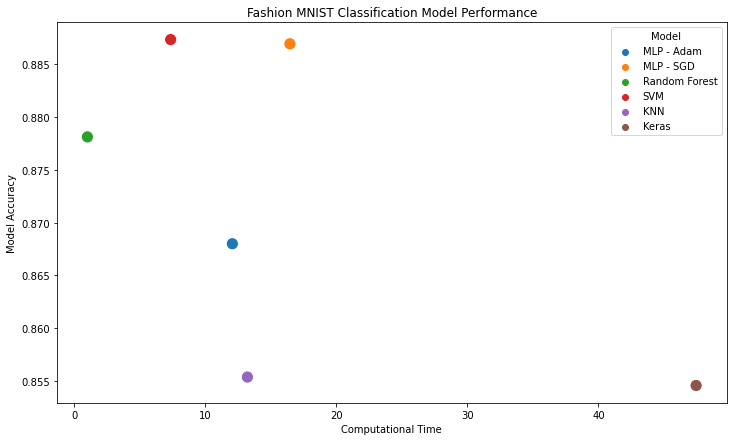

In [193]:
# Plot! 

figure(figsize=(12, 7))

sns.scatterplot(data = performance, x = "Time", y = "Accuracy", hue = "Model", s = 150)

plt.xlabel('Computational Time')
plt.ylabel('Model Accuracy')
plt.title('Fashion MNIST Classification Model Performance')